In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
ETH_ticker=yf.Ticker("ETH-USD")

In [4]:
ETH=ETH_ticker.history(period="max")
ETH

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-24 00:00:00+00:00,3482.151855,3487.653076,3304.039307,3336.339355,16040945448,0.0,0.0
2024-07-25 00:00:00+00:00,3336.362305,3341.438477,3088.764404,3174.427246,25293745810,0.0,0.0
2024-07-26 00:00:00+00:00,3174.051025,3285.760986,3172.777100,3275.951416,15993893521,0.0,0.0


In [5]:
pip install neuralprophet

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [6]:
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [7]:
import pickle

In [8]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2454 entries, 2017-11-09 00:00:00+00:00 to 2024-07-29 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2454 non-null   float64
 1   High          2454 non-null   float64
 2   Low           2454 non-null   float64
 3   Close         2454 non-null   float64
 4   Volume        2454 non-null   int64  
 5   Dividends     2454 non-null   float64
 6   Stock Splits  2454 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 153.4 KB


In [9]:
ETH_reset = ETH.reset_index()
ETH_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          2454 non-null   datetime64[ns, UTC]
 1   Open          2454 non-null   float64            
 2   High          2454 non-null   float64            
 3   Low           2454 non-null   float64            
 4   Close         2454 non-null   float64            
 5   Volume        2454 non-null   int64              
 6   Dividends     2454 non-null   float64            
 7   Stock Splits  2454 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 153.5 KB


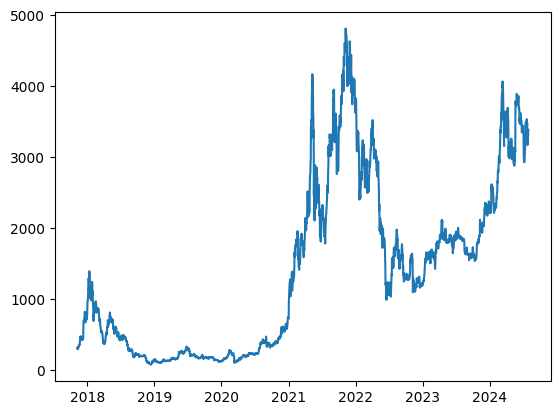

In [11]:
plt.plot(ETH_reset['Date'],ETH_reset['Close'])
plt.show()

In [12]:
ETH_reset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
ETH_final=ETH_reset[['ds','y']]
ETH_final.head()

,ds,y
0,2017-11-09 00:00:00+00:00,320.884003
1,2017-11-10 00:00:00+00:00,299.252991
2,2017-11-11 00:00:00+00:00,314.681000
3,2017-11-12 00:00:00+00:00,307.907990
4,2017-11-13 00:00:00+00:00,316.716003


In [13]:
ETH_train=ETH_final.iloc[:len(ETH_final)-365]
ETH_test=ETH_final.iloc[len(ETH_final)-365:]
print(ETH_train.shape)
print(ETH_test.shape)

(2089, 2)
(365, 2)


In [17]:
model_np=NeuralProphet(batch_size=8)
model_np.fit(ETH_train,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.952% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.952% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.402601,0.0,2207.842529,2729.948486,0.401427,0.0,0
1,0.065388,0.0,615.785950,790.778198,0.065444,0.0,1
2,0.049914,0.0,528.726440,670.599854,0.049767,0.0,2
3,0.040596,0.0,456.816864,589.333679,0.040472,0.0,3
4,0.035364,0.0,418.422913,539.100342,0.035273,0.0,4
...,...,...,...,...,...,...,...
995,0.021231,0.0,291.355804,389.601990,0.021176,0.0,995
996,0.021257,0.0,289.146820,390.518127,0.021228,0.0,996
997,0.021294,0.0,288.490143,388.463043,0.021224,0.0,997
998,0.021222,0.0,286.080109,391.279846,0.021156,0.0,998


In [18]:
# future = model_np.make_future_dataframe(btc_final, periods=365)
forecast=model_np.predict(ETH_final)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.919% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.919% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.919% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.919% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2017-11-09,320.884003,699.420349,653.479309,21.510490,24.430548
1,2017-11-10,299.252991,671.811340,652.500061,21.594475,-2.283173
2,2017-11-11,314.681000,670.185913,651.520813,21.377249,-2.712165
3,2017-11-12,307.907990,666.845398,650.541565,20.888945,-4.585123
4,2017-11-13,316.716003,669.707397,649.562378,20.157743,-0.012754


In [19]:
plot1 = model_np.plot(forecast)
plot1.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [20]:
from statsmodels.tools.eval_measures import rmse

In [21]:
predictions = forecast.iloc[-365:]['yhat1']

In [22]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,ETH_test['y']))
print("Mean Value of Test Dataset:", ETH_test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  2224.570825870063
Mean Value of Test Dataset: 2609.3676082245292


In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(ETH_test.y, predictions)
print("R-squared:", r2)

R-squared: -7.568445220191657
